# Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
             'sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [3]:
df = pd.read_csv(r"adult.data", sep=",",encoding='ISO-8859-1',header=None, names=col_names)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,NaN,State-gov,NaN,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,NaN,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
df = df.replace(' <=50K', 0)
df = df.replace(' >50K', 1)

In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,NaN,State-gov,NaN,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,NaN,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
32557,40.0,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
32558,58.0,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
32559,22.0,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


In [8]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32558 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32542 non-null  float64
 3   education       32560 non-null  object 
 4   education-num   32533 non-null  object 
 5   marital-status  32553 non-null  object 
 6   occupation      32555 non-null  object 
 7   relationship    32558 non-null  object 
 8   race            32560 non-null  object 
 9   sex             32560 non-null  object 
 10  capital-gain    32547 non-null  float64
 11  capital-loss    32547 non-null  float64
 12  hours-per-week  32538 non-null  float64
 13  native-country  32561 non-null  object 
 14  class           32561 non-null  int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age                3
workclass          0
fnlwgt            19
education          1
education-num     28
marital-status     8
occupation         6
relationship       3
race               1
sex                1
capital-gain      14
capital-loss      14
hours-per-week    23
native-country     0
class              0
dtype: int64

In [12]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,class
count,32558.000000,3.254200e+04,32547.000000,32547.000000,32538.000000,32561.000000
mean,38.581547,1.897890e+05,1076.875411,87.224967,40.435091,0.240810
std,13.640831,1.055610e+05,7385.232827,402.794325,12.343150,0.427581
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178285e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370748e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


# Missing Value handling

## Omission Method

Deleting rows with missing values

In [13]:
df1 =  df.dropna(axis = 0)

In [14]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32449 entries, 2 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32449 non-null  float64
 1   workclass       32449 non-null  object 
 2   fnlwgt          32449 non-null  float64
 3   education       32449 non-null  object 
 4   education-num   32449 non-null  object 
 5   marital-status  32449 non-null  object 
 6   occupation      32449 non-null  object 
 7   relationship    32449 non-null  object 
 8   race            32449 non-null  object 
 9   sex             32449 non-null  object 
 10  capital-gain    32449 non-null  float64
 11  capital-loss    32449 non-null  float64
 12  hours-per-week  32449 non-null  float64
 13  native-country  32449 non-null  object 
 14  class           32449 non-null  int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 4.0+ MB


# Outlier detection

In [16]:
df2 = df1[['age','fnlwgt','capital-gain','capital-loss','hours-per-week','class']]
df2

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,class
2,38.0,215646.0,0.0,0.0,40.0,0
3,53.0,234721.0,0.0,0.0,40.0,0
4,28.0,338409.0,0.0,0.0,40.0,0
5,37.0,284582.0,0.0,0.0,40.0,0
6,49.0,160187.0,0.0,0.0,16.0,0
...,...,...,...,...,...,...
32556,27.0,257302.0,0.0,0.0,38.0,0
32557,40.0,154374.0,0.0,0.0,40.0,1
32558,58.0,151910.0,0.0,0.0,40.0,0
32559,22.0,201490.0,0.0,0.0,20.0,0


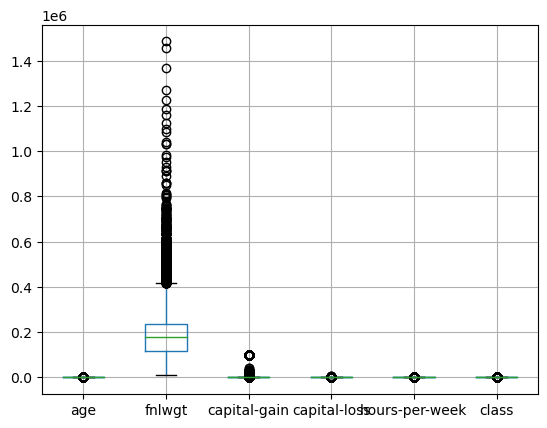

In [17]:
boxplot = df2.boxplot(column=['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'class'])

### Outlier removal using Mean-SDV

In [18]:
import numpy as np
import statistics

In [19]:
m = np.mean(df2['age'])
sd = statistics.stdev(df2['age'])
var = np.square(sd)

outliers = []

for i in df2['age']:
    if i>(m+sd*3) or i<(m-sd*3):
        outliers.append(i)
        
df2 = df2[(df2.age<m+sd*3) & (df2.age>m-sd*3)]

In [20]:
m = np.mean(df2['fnlwgt'])
sd = statistics.stdev(df2['fnlwgt'])
var = np.square(sd)

outliers = []

for i in df2['fnlwgt']:
    if i>(m+sd*3) or i<(m-sd*3):
        outliers.append(i)

df2 = df2[(df2.fnlwgt<m+sd*3) & (df2.fnlwgt>m-sd*3)]

In [21]:
m = np.mean(df2['capital-gain'])
sd = statistics.stdev(df2['capital-gain'])
var = np.square(sd)

outliers = []

for i in df2['capital-gain']:
    if i>(m+sd*3) or i<(m-sd*3):
        outliers.append(i)
        
df2 = df2[(df2['capital-gain']<m+sd*3) & (df2['capital-gain']>m-sd*3)]

In [22]:
m = np.mean(df2['capital-loss'])
sd = statistics.stdev(df2['capital-loss'])
var = np.square(sd)

outliers = []

for i in df2['capital-loss']:
    if i>(m+sd*3) or i<(m-sd*3):
        outliers.append(i)
        
df2 = df2[(df2['capital-loss']<m+sd*3) & (df2['capital-loss']>m-sd*3)]

In [23]:
m = np.mean(df2['hours-per-week'])
sd = statistics.stdev(df2['hours-per-week'])
var = np.square(sd)

outliers = []

for i in df2['hours-per-week']:
    if i>(m+sd*3) or i<(m-sd*3):
        outliers.append(i)
        
df2 = df2[(df2['hours-per-week']<m+sd*3) & (df2['hours-per-week']>m-sd*3)]

In [24]:
df2 = df2.astype(float)

In [25]:
df2.isnull().sum()

age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
class             0
dtype: int64

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29928 entries, 2 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29928 non-null  float64
 1   fnlwgt          29928 non-null  float64
 2   capital-gain    29928 non-null  float64
 3   capital-loss    29928 non-null  float64
 4   hours-per-week  29928 non-null  float64
 5   class           29928 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


### Outlier removal using Median-IQR Method

In [27]:
def mid_cal(li):
    l1=len(li)
    if(l1%2!=0):
        mid=li[int(l1/2)]
    else:        
        m1=li[int((l1-1)/2)]
        #print(m1)
        m2=li[int((l1+1)/2)]
        #print(m2)
        mid=((m1+m2)/2)
    return(mid)

In [28]:
def outlier(df,ft):
    list1=list(df[ft])
    #Q1=df[ft].quantile(0.25)
    #Q3=df[ft].quantile(0.75)
    #IQR=Q3-Q1
    
    #lower_bound= Q1-1.5*IQR
    #upper_bound= Q3+1.5*IQR
 
    #df[ft].sort()
    #df.sort_values(by=ft)
    
    list1.sort()
    print("Sorted List:",list1)
    Outlier_list=[]
    Updated_list=[]
    first_half=[]
    sec_half=[]
    len1=len(list1)
    print("len1:",len1)
    Q2=mid_cal(list1)
   
    # mid=l1/2
    median=Q2
    print('Median:',median)

    # if len1%2!=0:
    #odd
    #first half
    for x in list1:
        if(x<=Q2):
            first_half.append(x)
    
    #second half
        elif(x>Q2):
            sec_half.append(x)
    print('first_half:',first_half)        
    print('sec_half:',sec_half)
    Q1=mid_cal(first_half)
    

    #sec_half=list1[Q2:]
    Q3=mid_cal(sec_half)
    print("q3:",Q3)
    print("q1:",Q1)
    print("q2:",Q2)
    
    #Interquartile Range
    IQR=Q3-Q1
    print("IQR:",IQR)

    #Lower Bound
    L1=Q1-(1.5)*IQR
    print("L1:",L1)
    #Upper Bound
    U1=Q3+(1.5)*IQR
    print("U1:",U1)



    ls=df.index[(df[ft]<L1)|(df[ft]>U1)]
    
    

    for i in list1:
            if((i<L1)or(i>U1)):
                Outlier_list.append(i)
       
            else:
                Updated_list.append(i)
    
    print('Original_list:',list1)
    print('Outlier_list:',Outlier_list)
    print('Updated_list:',Updated_list) 
    print(ls)
    return ls

In [29]:
index_list = []

for f in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']:
    index_list.extend(outlier(df2,f))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
def remove(df2,ls):
    ls=sorted(set(ls))
    df2 = df2.drop(ls)
    return df2

In [31]:
df_clened = remove(df2, index_list)

In [32]:
df2.shape

(29928, 6)

In [33]:
df2

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,class
2,38.0,215646.0,0.0,0.0,40.0,0.0
3,53.0,234721.0,0.0,0.0,40.0,0.0
4,28.0,338409.0,0.0,0.0,40.0,0.0
5,37.0,284582.0,0.0,0.0,40.0,0.0
6,49.0,160187.0,0.0,0.0,16.0,0.0
...,...,...,...,...,...,...
32556,27.0,257302.0,0.0,0.0,38.0,0.0
32557,40.0,154374.0,0.0,0.0,40.0,1.0
32558,58.0,151910.0,0.0,0.0,40.0,0.0
32559,22.0,201490.0,0.0,0.0,20.0,0.0


# Data Visualizaion

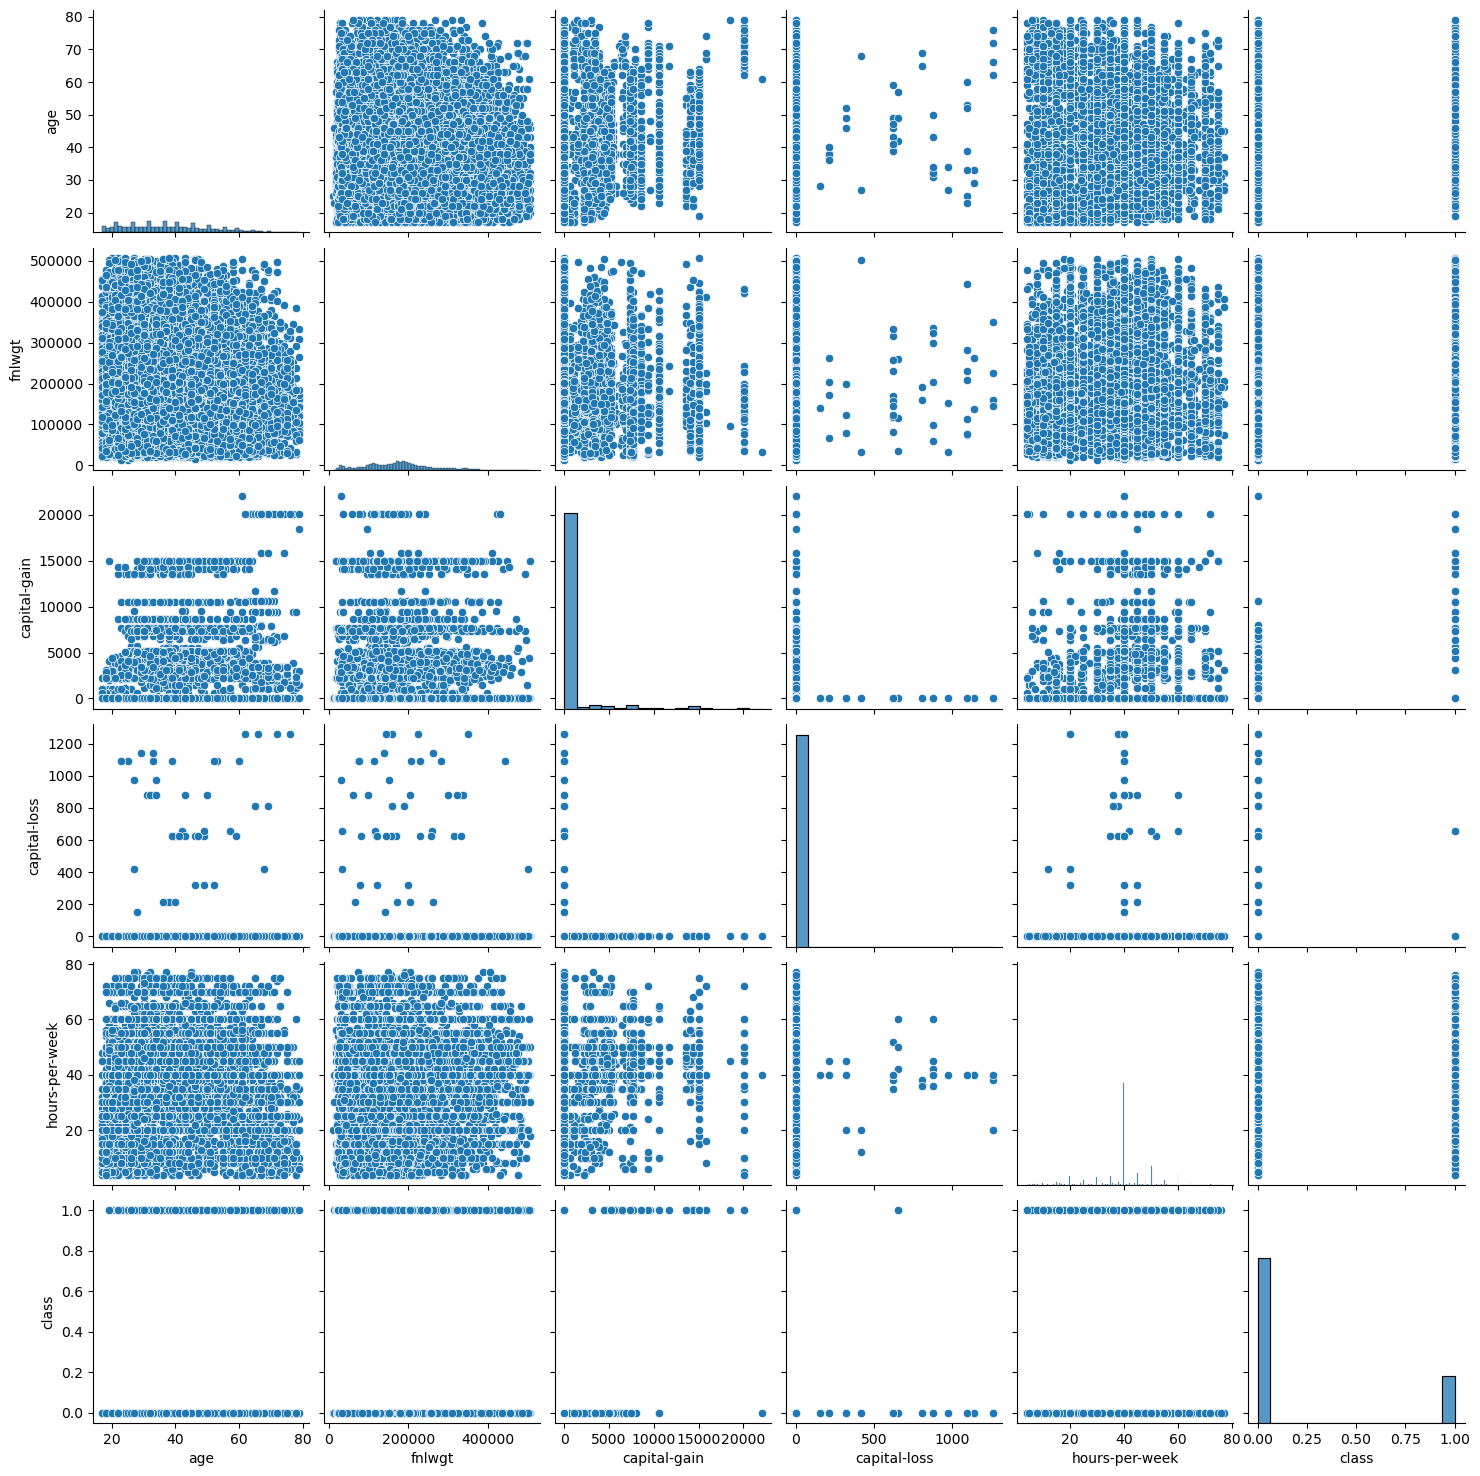

In [34]:
sns.pairplot(df2[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']])
plt.show()

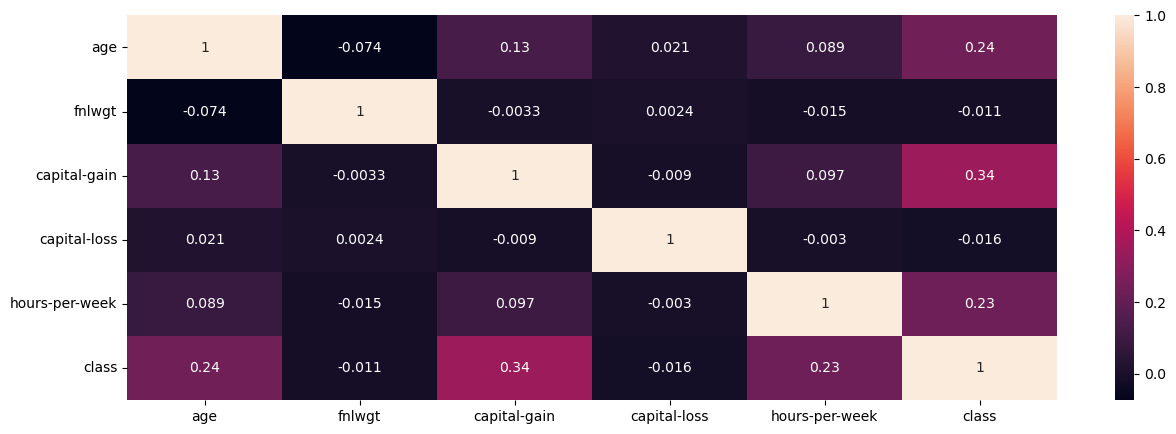

In [35]:
plt.figure(figsize = (15,5))
sns.heatmap(df2.corr(), annot=True)
plt.show()

### Show the dispersion (standard deviation and IQR) of features

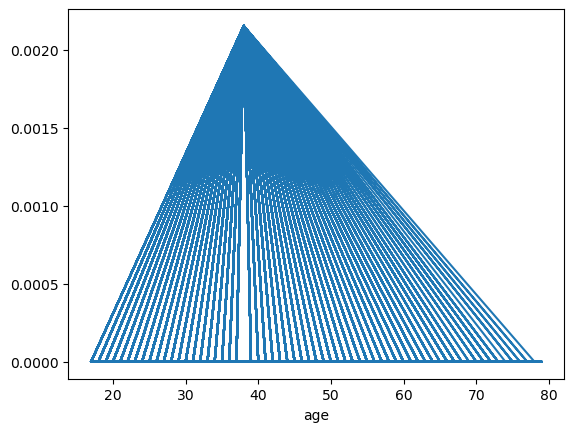

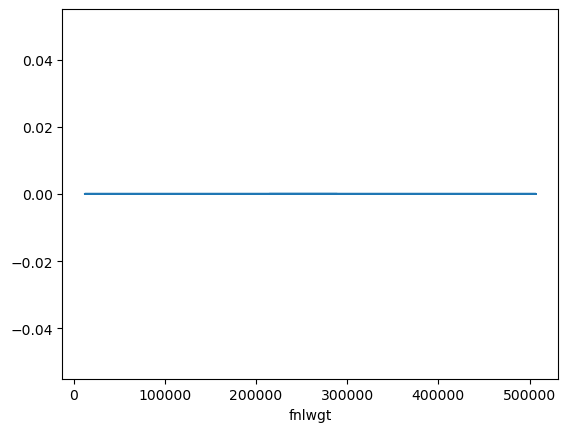

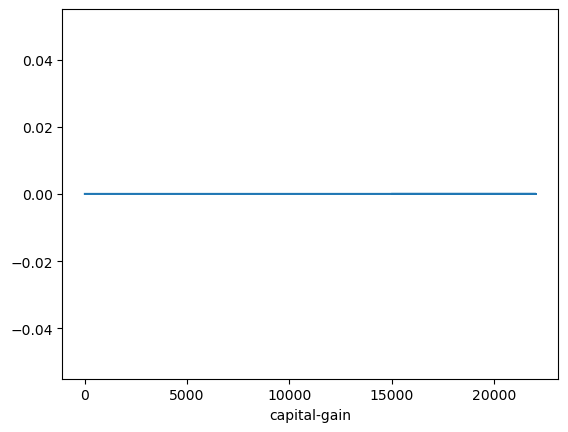

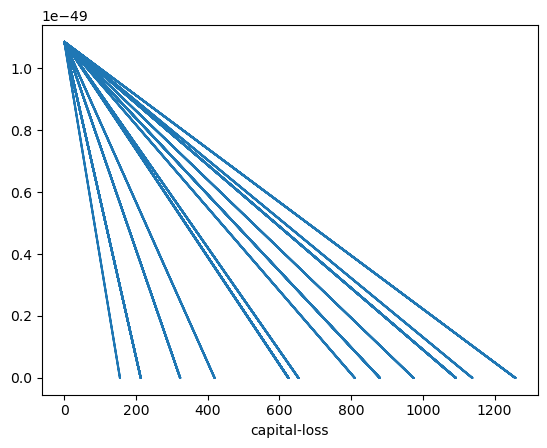

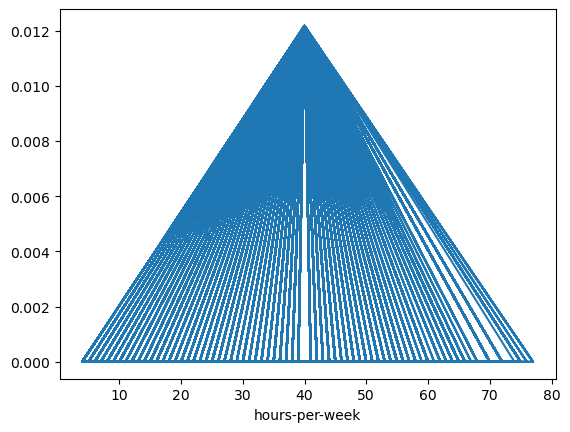

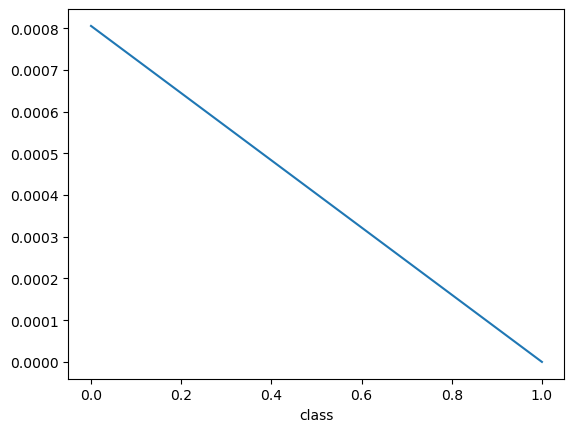

In [36]:
for i in df2:
    m1 = np.mean(df2[i])
    sd1 = statistics.stdev(df2[i])
    var1 = np.square(sd)

    x = df2[i]
    y = np.exp(-np.square(x-m1)/2*var1) / np.sqrt(2*np.pi*var1)
    
    plt.plot(x,y)
    plt.xlabel(i)
    plt.show()
    

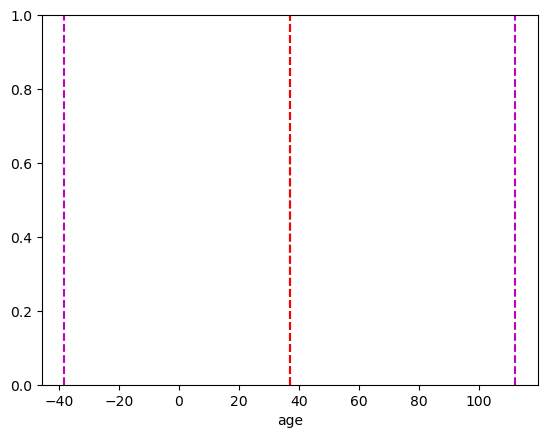

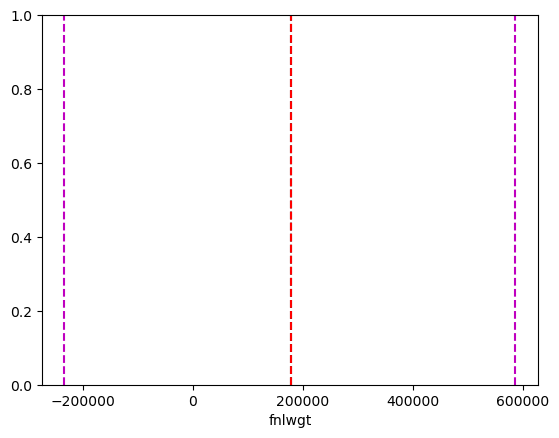

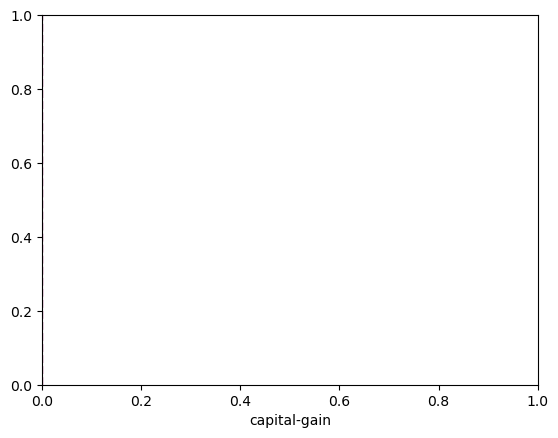

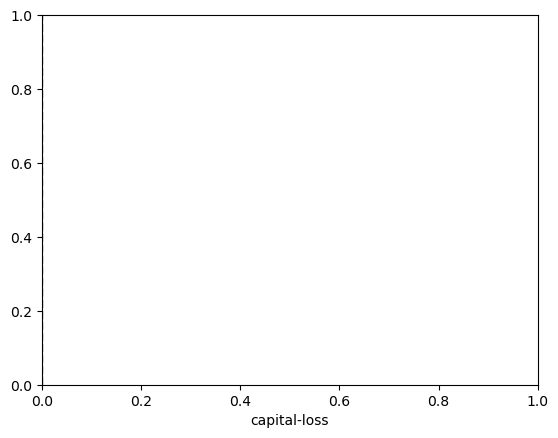

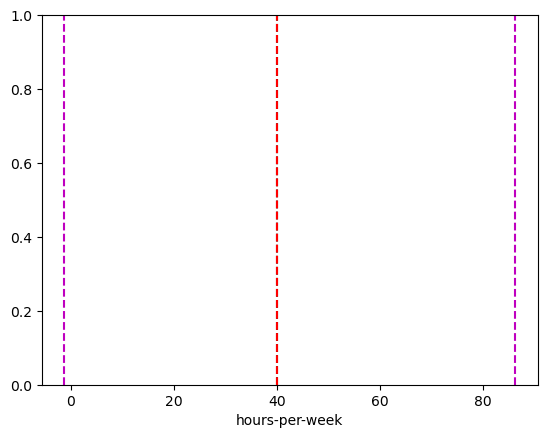

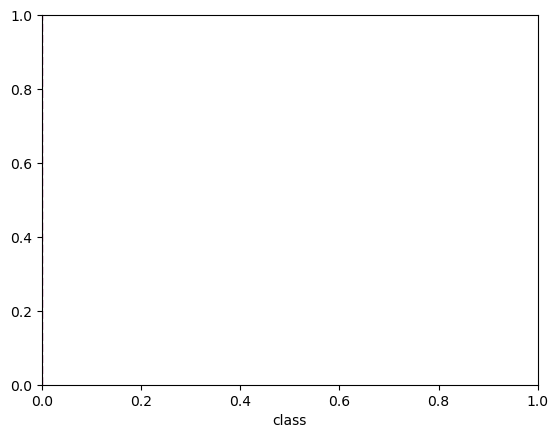

In [37]:
for i in df2:
    median = df2[i].median()
    sd = df2[i].std()
    q1 = df2[i].quantile(0.25)
    q2 = df2[i].quantile(0.5)
    q3 = df2[i].quantile(0.75)
    limit = 1.5*q3-q1
    l_limit = q1-1.5*limit
    u_limit = q3+1.5*limit
    
    plt.bar = (df2[i].unique(), df2[i].value_counts())
    plt.axvline(median, color='k', linestyle = 'dashed')
    plt.axvline(l_limit, color='m', linestyle = 'dashed')
    plt.axvline(q2, color='r', linestyle = 'dashed')
    plt.axvline(u_limit, color='m', linestyle = 'dashed')
    plt.xlabel(i)
    plt.show()

# Splitting data for training and testing

In [38]:
X = df2.drop(['class'],axis = 1)
y = df2['class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Supervised Algorithm

### KNN Algorithm

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_value = 1
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  79.15135315736718


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
from sklearn import metrics

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[4287,  405],
       [ 843,  451]], dtype=int64)

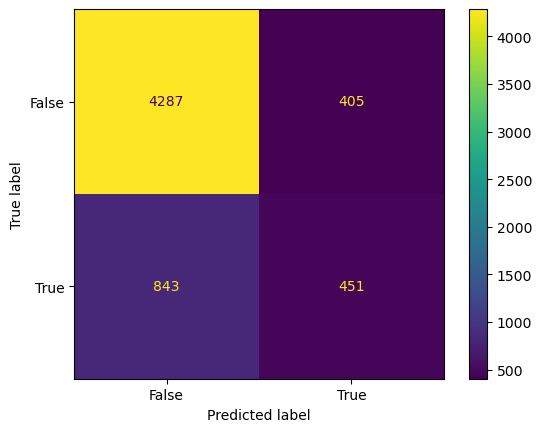

In [44]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Applying Unsupervised learning

### KMeans

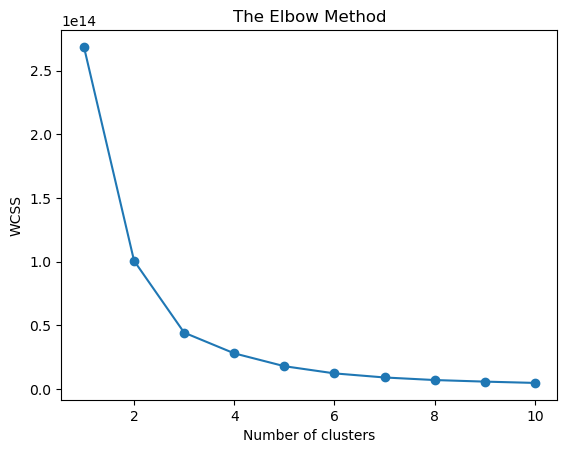

In [45]:
X = df2.iloc[:,:].values


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

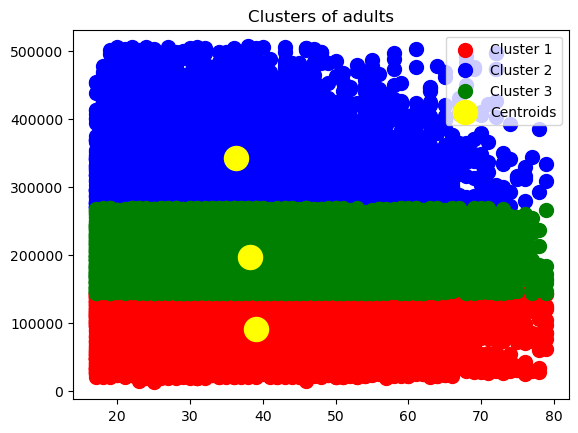

In [46]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of adults')
plt.legend()
plt.show()